In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r'C:\Users\Bishownath Raut\Downloads\ev_market_raw_dataset.csv')

In [3]:
# Dimensions and general info
print("Shape of the dataset:", df.shape)
df.info()

# Summary statistics
df.describe(include='all')


Shape of the dataset: (10650, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10650 entries, 0 to 10649
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Country              10650 non-null  object 
 1   Year                 10650 non-null  int64  
 2   Manufacturer         10650 non-null  object 
 3   EV_Sales_(USD)       10110 non-null  object 
 4   Charging_Stations    9581 non-null   float64
 5   EV_Market_Share(%)   9604 non-null   float64
 6   Total_Vehicles_Sold  10110 non-null  float64
 7   EV_Type              10650 non-null  object 
 8   GDP_per_Capita       10108 non-null  float64
 9   Govt_Incentives      9635 non-null   object 
dtypes: float64(4), int64(1), object(5)
memory usage: 832.2+ KB


,Country,Year,Manufacturer,EV_Sales_(USD),Charging_Stations,EV_Market_Share(%),Total_Vehicles_Sold,EV_Type,GDP_per_Capita,Govt_Incentives
count,10650,10650.000000,10650,10110,9581.000000,9604.000000,10110.000000,10650,10108.000000,9635
unique,20,NaN,20,9015,NaN,NaN,NaN,3,NaN,5
top,India,NaN,Ford,"$22,584",NaN,NaN,NaN,PHEV,NaN,no
freq,1104,NaN,1106,4,NaN,NaN,NaN,3599,NaN,2032
mean,NaN,2019.516808,NaN,NaN,2510.889051,15.416608,75377.244708,NaN,39776.044717,NaN
std,NaN,2.872661,NaN,NaN,1439.901132,8.303942,32127.675013,NaN,23011.498012,NaN
min,NaN,2015.000000,NaN,NaN,10.000000,1.000000,1595.000000,NaN,1005.000000,NaN
25%,NaN,2017.000000,NaN,NaN,1283.000000,8.280000,50350.250000,NaN,19376.500000,NaN
50%,NaN,2019.000000,NaN,NaN,2502.000000,15.395000,75291.500000,NaN,39488.000000,NaN
75%,NaN,2022.000000,NaN,NaN,3769.000000,22.502500,100130.750000,NaN,59863.000000,NaN


In [4]:
# Count missing values per column
missing_values = df.isnull().sum()
print("Missing values:\n", missing_values)

# Percentage of missing values
missing_percent = (missing_values / len(df)) * 100
print("Missing percentage:\n", missing_percent)


Missing values:
 Country                   0
Year                      0
Manufacturer              0
EV_Sales_(USD)          540
Charging_Stations      1069
EV_Market_Share(%)     1046
Total_Vehicles_Sold     540
EV_Type                   0
GDP_per_Capita          542
Govt_Incentives        1015
dtype: int64
Missing percentage:
 Country                 0.000000
Year                    0.000000
Manufacturer            0.000000
EV_Sales_(USD)          5.070423
Charging_Stations      10.037559
EV_Market_Share(%)      9.821596
Total_Vehicles_Sold     5.070423
EV_Type                 0.000000
GDP_per_Capita          5.089202
Govt_Incentives         9.530516
dtype: float64


In [5]:
# Check unique values for suspected categorical columns
categorical_columns = df.select_dtypes(include='object').columns

for col in categorical_columns:
    print(f"\nUnique values in '{col}':")
    print(df[col].value_counts(dropna=False))



Unique values in 'Country':
Country
India          1104
China          1076
USA            1074
Germany        1070
UK             1061
Netherlands    1059
Canada         1042
Japan          1025
Norway         1023
France         1021
france           12
india            12
germany          11
china            10
netherlands      10
norway            9
japan             9
uk                8
usa               7
canada            7
Name: count, dtype: int64

Unique values in 'Manufacturer':
Manufacturer
Ford              1106
BMW               1090
Renault           1077
Kia               1070
Chevrolet         1052
Tesla             1051
BYD               1034
Nissan            1033
Volkswagen        1020
Hyundai           1014
BYD Inc             19
Hyundai Inc         15
Tesla Inc           14
Kia Inc             13
Nissan Inc          10
Renault Inc          8
BMW Inc              7
Chevrolet Inc        6
Ford Inc             6
Volkswagen Inc       5
Name: count, dtype: int64

Uni

In [6]:
# Check datatypes
print("Data types:\n", df.dtypes)

# Example: if currency fields are stored as strings
df['EV_Sales_(USD)'].head()


Data types:
 Country                 object
Year                     int64
Manufacturer            object
EV_Sales_(USD)          object
Charging_Stations      float64
EV_Market_Share(%)     float64
Total_Vehicles_Sold    float64
EV_Type                 object
GDP_per_Capita         float64
Govt_Incentives         object
dtype: object


0    $16,295 
1         NaN
2    $16,523 
3     $2,933 
4    $27,980 
Name: EV_Sales_(USD), dtype: object

In [7]:
# Count duplicate rows
duplicate_count = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")


Number of duplicate rows: 150


In [8]:
# Fill numeric columns with mean
df['EV_Sales_(USD)'] = df['EV_Sales_(USD)'].replace({r'\$': '', ',': ''}, regex=True).astype(float)
df['EV_Sales_(USD)'] = df['EV_Sales_(USD)'].fillna(df['EV_Sales_(USD)'].mean())

df['Total_Vehicles_Sold'] = df['Total_Vehicles_Sold'].fillna(df['Total_Vehicles_Sold'].mean())

# Fill categorical column with mode or specific value
df['Govt_Incentives'] = df['Govt_Incentives'].fillna('No')


In [9]:
df['Country'] = df['Country'].str.title()
df['Govt_Incentives'] = df['Govt_Incentives'].str.upper()


In [10]:
df = df.drop_duplicates()


In [11]:
# Confirm fixes
print("Final missing values:\n", df.isnull().sum())
print("Shape after cleaning:", df.shape)
df.head()


Final missing values:
 Country                   0
Year                      0
Manufacturer              0
EV_Sales_(USD)            0
Charging_Stations      1047
EV_Market_Share(%)     1028
Total_Vehicles_Sold       0
EV_Type                   0
GDP_per_Capita          534
Govt_Incentives           0
dtype: int64
Shape after cleaning: (10500, 10)


,Country,Year,Manufacturer,EV_Sales_(USD),Charging_Stations,EV_Market_Share(%),Total_Vehicles_Sold,EV_Type,GDP_per_Capita,Govt_Incentives
0,China,2015,BMW,16295.000000,870.0,6.32,94115.000000,BEV,55886.0,NO
1,France,2018,Chevrolet,25153.790504,476.0,3.90,75377.244708,HEV,45131.0,YES
2,Germany,2021,Hyundai,16523.000000,140.0,1.60,18292.000000,PHEV,60735.0,NO
3,Usa,2022,Chevrolet,2933.000000,1194.0,9.82,32626.000000,BEV,72932.0,YES
4,Usa,2018,BMW,27980.000000,484.0,18.74,47411.000000,BEV,3747.0,NO


In [14]:
# Step 1: Convert and clean GDP column if needed
df['GDP_per_Capita'] = pd.to_numeric(df['GDP_per_Capita'], errors='coerce')

# Step 2: Fill numeric columns with their mean
df['Charging_Stations'] = df['Charging_Stations'].fillna(df['Charging_Stations'].mean())
df['EV_Market_Share(%)'] = df['EV_Market_Share(%)'].fillna(df['EV_Market_Share(%)'].mean())
df['GDP_per_Capita'] = df['GDP_per_Capita'].fillna(df['GDP_per_Capita'].mean())


In [16]:
print("Final missing values:\n", df.isnull().sum())
print("Shape after cleaning:", df.shape)

Final missing values:
 Country                0
Year                   0
Manufacturer           0
EV_Sales_(USD)         0
Charging_Stations      0
EV_Market_Share(%)     0
Total_Vehicles_Sold    0
EV_Type                0
GDP_per_Capita         0
Govt_Incentives        0
dtype: int64
Shape after cleaning: (10500, 10)


In [17]:
print("\nDescriptive Statistics (Numeric):")
print(df.describe())



Descriptive Statistics (Numeric):
               Year  EV_Sales_(USD)  Charging_Stations  EV_Market_Share(%)  \
count  10500.000000    10500.000000       10500.000000        10500.000000   
mean    2019.517905    25145.213275        2510.388765           15.421471   
std        2.871633    13895.852985        1365.964849            7.888260   
min     2015.000000      502.000000          10.000000            1.000000   
25%     2017.000000    13347.000000        1420.000000            8.950000   
50%     2019.000000    25153.790504        2510.388765           15.421471   
75%     2022.000000    36704.250000        3638.000000           21.722500   
max     2024.000000    49995.000000        4999.000000           30.000000   

       Total_Vehicles_Sold  GDP_per_Capita  
count         10500.000000    10500.000000  
mean          75429.657734    39797.014850  
std           31295.420819    22401.636387  
min            1595.000000     1005.000000  
25%           51739.250000    20635.5

In [18]:
print("\nDescriptive Statistics (Categorical):")
print(df.describe(include='object'))



Descriptive Statistics (Categorical):
       Country Manufacturer EV_Type Govt_Incentives
count    10500        10500   10500           10500
unique      10           20       3               2
top      India         Ford    PHEV             YES
freq      1101         1094    3547            5702


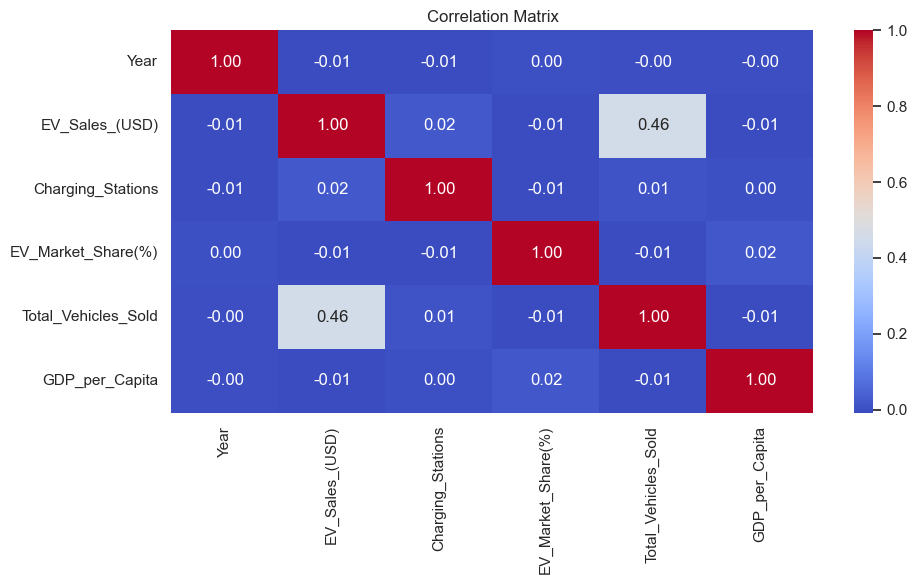

In [22]:
# Correlation heatmap for numeric variables
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()


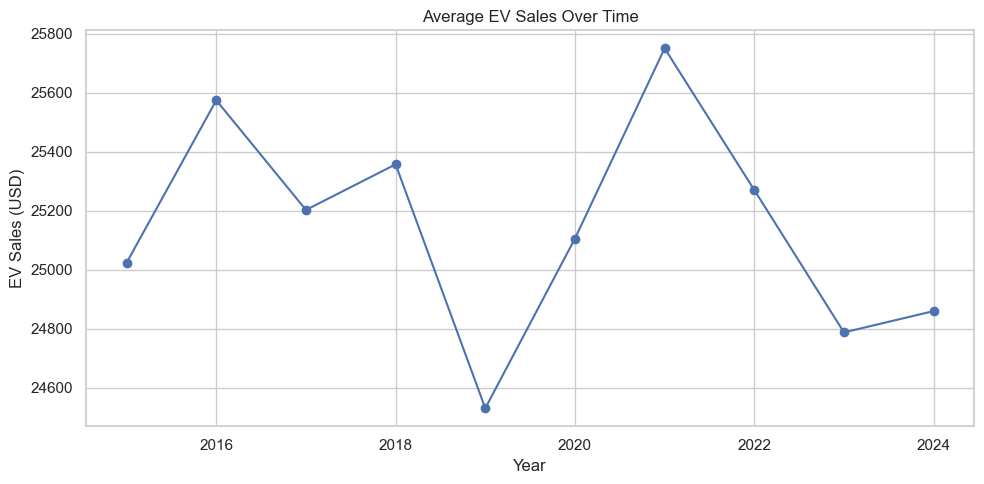

In [23]:
# Average EV sales per year
ev_sales_by_year = df.groupby('Year')['EV_Sales_(USD)'].mean()

ev_sales_by_year.plot(kind='line', marker='o', figsize=(10,5), title='Average EV Sales Over Time')
plt.ylabel('EV Sales (USD)')
plt.grid(True)
plt.tight_layout()
plt.show()


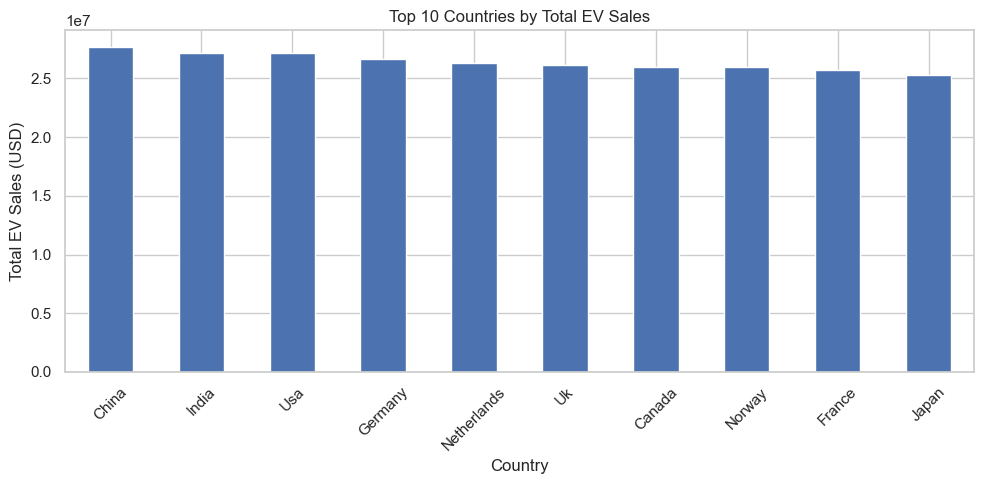

In [24]:
top_countries = df.groupby('Country')['EV_Sales_(USD)'].sum().nlargest(10)

top_countries.plot(kind='bar', figsize=(10,5), title='Top 10 Countries by Total EV Sales')
plt.ylabel('Total EV Sales (USD)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


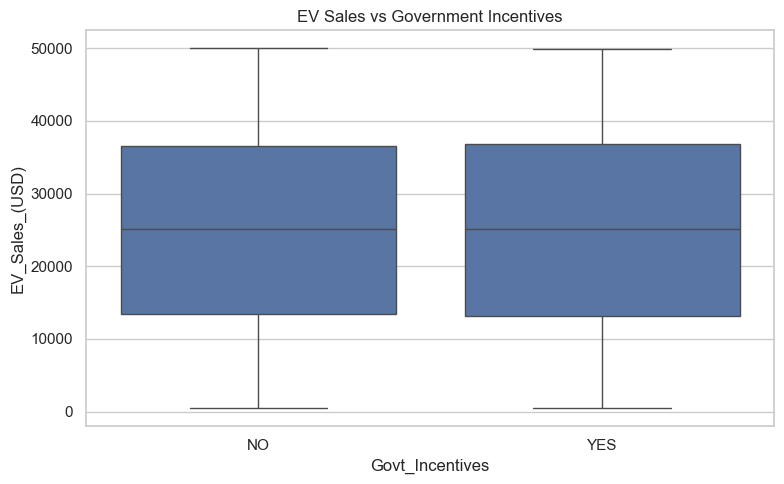

In [25]:
# Compare EV sales based on government incentives
plt.figure(figsize=(8,5))
sns.boxplot(x='Govt_Incentives', y='EV_Sales_(USD)', data=df)
plt.title("EV Sales vs Government Incentives")
plt.tight_layout()
plt.show()


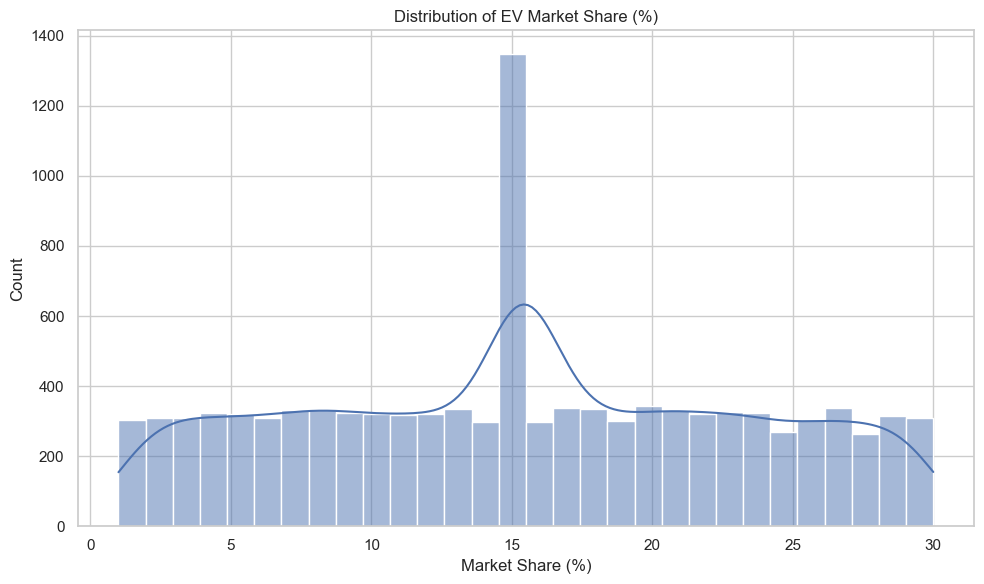

In [26]:
plt.figure(figsize=(10,6))
sns.histplot(df['EV_Market_Share(%)'], bins=30, kde=True)
plt.title("Distribution of EV Market Share (%)")
plt.xlabel("Market Share (%)")
plt.tight_layout()
plt.show()


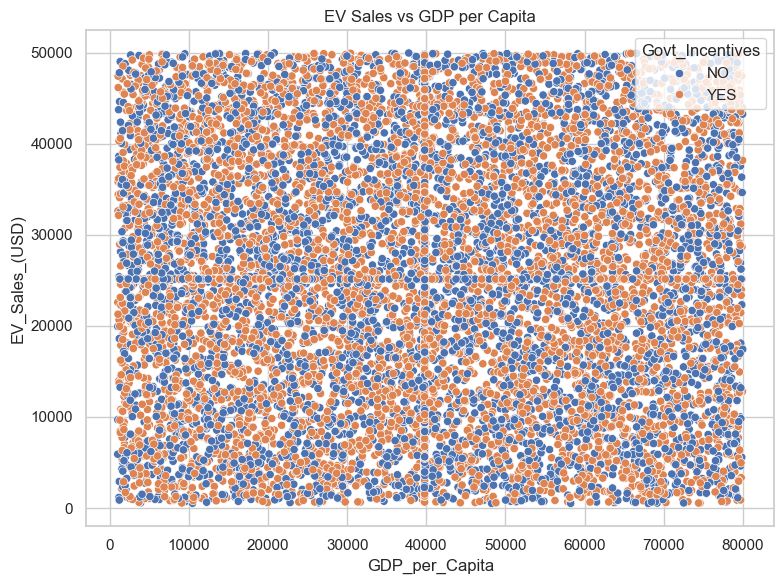

In [27]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='GDP_per_Capita', y='EV_Sales_(USD)', hue='Govt_Incentives', data=df)
plt.title("EV Sales vs GDP per Capita")
plt.tight_layout()
plt.show()
